In [1]:
import pandas as pd
import numpy as np 
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
def load_dataset(path,missing_headers=False):
    if missing_headers:
        data = pd.read_csv(path, header = None )
    else:
        data = pd.read_csv(path ,header = 0 )
    
#     global rows,columns
#     rows,columns = data.shape
    return data
def handling_missingData(data):
    data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    have_nan =data.isin(['?']).sum() > 0
    data.replace('?', np.nan , inplace=True)
    lastindex = len(data.columns) - 1
    X,y = data.drop(lastindex,axis =1),data[lastindex]
    categoryCols = X.select_dtypes(include=["object"]).columns
    numericCols = X.select_dtypes(include=["int64","float64"]).columns
    for column in categoryCols:
        if column in have_nan :
            data[column] = data[column].fillna(data[column].mode()[0])
    for column in numericCols:
        if column in have_nan :
            data[column] = data[column].fillna(data[column].mean())
    return data 
def Remove_outliers(data):
    lastindex = len(data.columns) -1
    numerixs = [i for i in range(len(data.iloc[0])) if type(data.iloc[0,i]) != str]

    mean = data.describe().iloc[1, :]
#     mean la vi tri index 1 trong discribe , lay toan bo mean cua cac cot cua data 
    std = data.describe().iloc[2, :]
#     std la vi tri index 2 trong discribe ,...
    
    for(numerix , mean, std) in zip(numerixs, mean, std):
        data = data[data[numerix] < 3*std + mean]
        
    return data 
def labelEncoder(data):
    for col in data.columns:
        if data[col].dtypes == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))
    return data 

    
def BalancingData(data):
    Y_train = data.values[:,-1]
    X_train = data.values[:,:-1]
    counter = Counter(Y_train)
    print(counter)
    
    for k,v in counter.items():
        per = v/len(Y_train)*100
        print("Class%s,Counter%d,Percentage%3f%%",(k,v,per))
    
    overSample = SMOTE()
    A,b = overSample.fit_resample(X_train,Y_train)
    
    counter = Counter(b)
    print( counter)
    return data,A,b
def standardizeFeatures(data):
    mmscaler = MinMaxScaler()
    data.columns =["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","Salary"]
    cols = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
    data[cols] = mmscaler.fit_transform(data[cols])
    data = pd.DataFrame(data[cols])
    return data
def evaluate_model(X, y, model):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores    
    
data = load_dataset("adult-all.csv" , missing_headers= True)
data.head()
# handling_missingData(data)
# Remove_outliers(data)
# standardizeFeatures(data)
# labelEncoder(data)
# BalancingData(data)
# Y_train = data.values[:,-1]
# X_train = data.values[:,:-1]
# model = SVC(gamma='scale')
# scores = evaluate_model(X_train,Y_train,model )
# print('Mean Accuracy: %.3f (%.3f)'% (np.mean(scores), np.std(scores)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
handling_missingData(data)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
Remove_outliers(data)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
standardizeFeatures(data)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [5]:
labelEncoder(data)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,1,0.021740,0.0,0.397959,39,0
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,1,0.000000,0.0,0.122449,39,0
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,1,0.000000,0.0,0.397959,39,0
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,1,0.000000,0.0,0.397959,39,0
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,0,0.000000,0.0,0.397959,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,5,4,0,0.000000,0.0,0.377551,39,0
32557,0.315068,4,0.096500,11,0.533333,2,7,0,4,1,0.000000,0.0,0.397959,39,1
32558,0.561644,4,0.094827,11,0.533333,6,1,4,4,0,0.000000,0.0,0.397959,39,0
32559,0.068493,4,0.128499,11,0.533333,4,1,3,4,1,0.000000,0.0,0.193878,39,0


In [6]:
BalancingData(data)


Counter({0.0: 24720, 1.0: 7841})
Class%s,Counter%d,Percentage%3f%% (0.0, 24720, 75.91904425539757)
Class%s,Counter%d,Percentage%3f%% (1.0, 7841, 24.080955744602438)
Counter({0.0: 24720, 1.0: 24720})


(            age  workclass    fnlwgt  education  education-num  \
 0      0.301370          7  0.044302          9       0.800000   
 1      0.452055          6  0.048238          9       0.800000   
 2      0.287671          4  0.138113         11       0.533333   
 3      0.493151          4  0.151068          1       0.400000   
 4      0.150685          4  0.221488          9       0.800000   
 ...         ...        ...       ...        ...            ...   
 32556  0.136986          4  0.166404          7       0.733333   
 32557  0.315068          4  0.096500         11       0.533333   
 32558  0.561644          4  0.094827         11       0.533333   
 32559  0.068493          4  0.128499         11       0.533333   
 32560  0.479452          5  0.187203         11       0.533333   
 
        marital-status  occupation  relationship  race  sex  capital-gain  \
 0                   4           1             1     4    1      0.021740   
 1                   2           4      

In [7]:
Y_train = data.values[:,-1]
X_train = data.values[:,:-1]
print(Y_train[0])
print(X_train[0])

0.0
[3.01369863e-01 7.00000000e+00 4.43018976e-02 9.00000000e+00
 8.00000000e-01 4.00000000e+00 1.00000000e+00 1.00000000e+00
 4.00000000e+00 1.00000000e+00 2.17402174e-02 0.00000000e+00
 3.97959184e-01 3.90000000e+01]


In [8]:
test = load_dataset("adult-test.csv" , missing_headers= True)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0.0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0.0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0.0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0.0,30,United-States,<=50K.


In [9]:
handling_missingData(test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0.0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0.0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0.0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0.0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0.0,36,United-States,<=50K.
16277,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0.0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0.0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0.0,40,United-States,<=50K.


In [10]:
standardizeFeatures(test)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.144430,0.400000,0.000000,0.000027,0.397959
1,0.287671,0.051677,0.533333,0.000000,0.000000,0.500000
2,0.150685,0.219011,0.733333,0.000000,0.000000,0.397959
3,0.369863,0.099418,0.600000,0.076881,0.000000,0.397959
4,0.013699,0.060942,0.600000,0.000000,0.000000,0.295918
...,...,...,...,...,...,...
16276,0.301370,0.136723,0.800000,0.000000,0.000000,0.357143
16277,0.643836,0.208484,0.533333,0.000000,0.000000,0.397959
16278,0.287671,0.244762,0.800000,0.000000,0.000000,0.500000
16279,0.369863,0.047666,0.800000,0.054551,0.000000,0.397959


In [11]:
labelEncoder(test)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,0.109589,4,0.144430,1,0.400000,4,7,3,2,1,0.000000,0.000027,0.397959,38,0
1,0.287671,4,0.051677,11,0.533333,2,5,0,4,1,0.000000,0.000000,0.500000,38,0
2,0.150685,2,0.219011,7,0.733333,2,11,0,4,1,0.000000,0.000000,0.397959,38,1
3,0.369863,4,0.099418,15,0.600000,2,7,0,2,1,0.076881,0.000000,0.397959,38,1
4,0.013699,0,0.060942,15,0.600000,4,0,3,4,0,0.000000,0.000000,0.295918,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.301370,4,0.136723,9,0.800000,0,10,1,4,0,0.000000,0.000000,0.357143,38,0
16277,0.643836,0,0.208484,11,0.533333,6,0,2,2,1,0.000000,0.000000,0.397959,38,0
16278,0.287671,4,0.244762,9,0.800000,2,10,0,4,1,0.000000,0.000000,0.500000,38,0
16279,0.369863,4,0.047666,9,0.800000,0,1,3,1,1,0.054551,0.000000,0.397959,38,0


In [15]:
X_test = test.values[:,:-1]
Y_test = test.values[:,-1]
print(X_test.shape)
print(Y_test.shape)

(16281, 14)
(16281,)


## Training use randomforestclassifier

In [14]:
train = RandomForestClassifier(n_estimators = 50)
train

RandomForestClassifier(n_estimators=50)

In [15]:
train.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50)

#### Predict

In [16]:
predSalary = train.predict(X_test)

In [17]:
print('Nhãn phán đoán')
print (predSalary [0:5])
print('Nhãn đúng')
print(list(Y_test)[0:5])

Nhãn phán đoán
[0. 0. 0. 1. 0.]
Nhãn đúng
[0.0, 0.0, 1.0, 1.0, 0.0]


#### Evaluate

In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
print(metrics.accuracy_score(Y_test, predSalary))

0.8450340888151834


In [19]:
print(list(data.columns)[0:-1])
print(list(train.feature_importances_))

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
[0.1515777717348887, 0.039847430309299055, 0.1715893925474559, 0.03027734461749382, 0.09934987529117657, 0.059831927760725094, 0.06719383269756238, 0.10269146304367532, 0.014109105158358367, 0.013692040106205079, 0.11501769755926804, 0.03509830053548854, 0.08305402728170652, 0.016669791356696596]


## Model selection

In [12]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from tqdm import tqdm

from sklearn.datasets import load_files
from pyvi import ViTokenizer

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

%matplotlib inline

In [14]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, Y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [03:05<00:00, 92.85s/it]


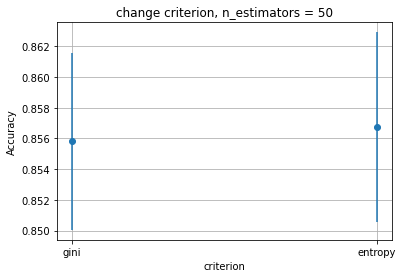

In [24]:
title = "change criterion, n_estimators = 50"
xlabel = "criterion"
X = []
Y = []
error = []

for criterion in tqdm(["gini", "entropy"]):
    text_clf = RandomForestClassifier(criterion = criterion, n_estimators = 50)
    mean, std = cross_validation(text_clf)
    X.append(str(criterion))
    Y.append(mean)
    error.append(std)
    
plot(title, xlabel, X, Y, error)
plt.savefig('image/RF_change_criterion.png',bbox_inches = 'tight')
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [14:41<00:00, 220.41s/it]


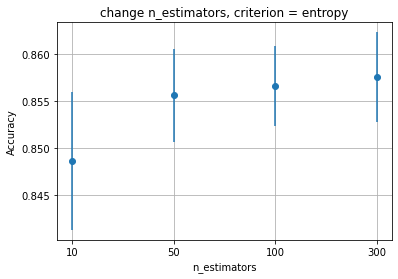

In [26]:
title = "change n_estimators, criterion = entropy"
xlabel = "n_estimators"
X=[]
Y = []
error = []

for n_estimators in tqdm([10, 50, 100, 300]):
    text_clf = RandomForestClassifier(criterion = 'entropy', n_estimators = n_estimators)
    mean, std = cross_validation(text_clf)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.savefig('image/change_N.png',bbox_inches = 'tight')
plt.show()


# SVM

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [15:17<00:00, 229.35s/it]


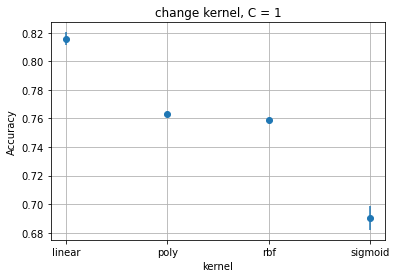

In [27]:
title = "change kernel, C = 1"
xlabel = "kernel"
X = []
Y = []
error = []

for kernel in tqdm(['linear', 'poly', 'rbf', 'sigmoid']):
    # Với mỗi kernel được chọn, 
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = svm.SVC(kernel = kernel, C=1.0)
    mean, std = cross_validation(text_clf)
    X.append(kernel)
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh 
plot(title, xlabel, X, Y, error)
plt.savefig('image/svm_change_kernel.png', bbox_inches='tight')
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [18:18<00:00, 274.58s/it]


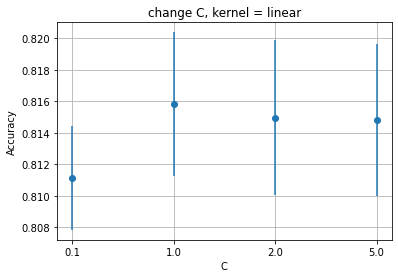

In [16]:
title = "change C, kernel = linear"
xlabel = "C"
X = []
Y = []
error = []

for C in tqdm([.1, 1.0, 2.0, 5.0]):
    # Với từng giá trị C nhận được, 
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = svm.SVC(kernel='linear', C=C)
    mean, std = cross_validation(text_clf)
    X.append(str(C))
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
plt.savefig('image/svm_change_C.png', bbox_inches='tight')
plt.show()

## Compare model

In [13]:
svm_ = svm.SVC(kernel = 'linear', C = 1.0)
rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 300)

svm_.fit(X_train,Y_train)
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [16]:
print(f'SVM: {accuracy_score(Y_test, svm_.predict(X_test))}')
print(f'RF: {accuracy_score(Y_test, rf.predict(X_test))}')

SVM: 0.8129721761562557
RF: 0.8471838339168356


C:\Users\huyvq\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


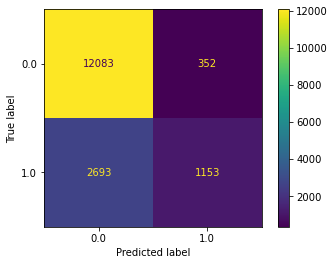

In [17]:
plot_confusion_matrix(svm_, X_test, Y_test)

C:\Users\huyvq\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


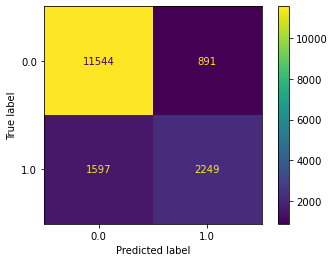

In [18]:
plot_confusion_matrix(rf, X_test, Y_test)